## Emotion_Datasets 

In [273]:
# Imports 

import numpy as np 
import pandas as pd 
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
import glob
import json


### AVReality 


In [274]:
# AV Reality Data
AVRq=pd.read_excel('/Users/emilydoherty/IRES-EmotionNN/AVReality/Data_new.xlsx',sheet_name="Sheet1")
AVRq['ID']=AVRq['ID'].astype(str)
AVRq.describe()
AVRq.head()

,ID,Age:,Sex:,ERQ,N_Valence,N_Arousal,N_Dominance,N_EMFACS,N_Realism,N_Appeal,...,N_Trustworthy,S_Valence,S_Arousal,S_Dominance,S_EMFACS,S_Realism,S_Appeal,S_Familiar,S_Friendly,S_Trustworthy
0,S01,22,Male,Cognitive Reappraisal,5,3,7,Happiness,6,3,...,7,4,3,7,Disgust,7,4,7,7,6
1,S02,22,Female,Cognitive Reappraisal,7,4,6,Happiness,6,4,...,4,4,6,4,Anger,6,3,6,5,6
2,S03,19,Male,Expressive Suppression,7,4,6,Happiness,6,6,...,5,4,5,6,Sadness,6,6,6,6,6
3,S04,27,Male,Expressive Suppression,9,5,3,Happiness,5,3,...,4,3,6,7,Anger,4,6,7,6,4
4,S05,20,Male,Cognitive Reappraisal,6,4,9,Sadness,6,4,...,3,7,6,9,Anger,6,4,5,5,2


In [275]:
#Nature GSR Files 
path = '/Users/emilydoherty/IRES-EmotionNN/AVReality/E4/Nature/GSR'
csv_files = glob.glob(path + "/*.csv")
csv_files=sorted(csv_files)

import scipy.signal as signal

# low-pass filter and normalization
def SignalTrans(_signalList, order, cutoff):
    wn = 2 * cutoff / 4
    b, a = signal.butter(order, wn, 'lowpass')
    filterY = signal.filtfilt(b, a, _signalList)

    _range = np.max(filterY) - np.min(filterY)
    filterY1 = (filterY - np.min(filterY)) / _range
    return filterY1

# EDA changes
def EDA_Vary(_signalList, wn):  
    _velocityList = [0]
    for i in range(1, len(_signalList)):
        _v = (_signalList[i] - _signalList[i - 1]) / wn
        _velocityList.append(abs(_v))
    return _velocityList

# Z-score
def z_score_normalization(x):
    x = (x - np.mean(x)) / np.std(x)
    return x

# Read each CSV file into DataFrame
# This creates a list of dataframes
N_GSR=[]

for file in csv_files:
	df_list = (pd.read_csv(file))
	df_list['filename']= os.path.basename(file)
	df_list['cond']= 'Nature'
	df_list['ID']= df_list['filename'].str.replace("_GSR_Nature.csv"," ")
	df_list['filtered'] = SignalTrans(df_list['Channel 1'],3,0.5)
	df_list['vary'] = EDA_Vary(df_list['filtered'],0.25)
	df_list['mean_GSR']=np.mean(df_list['vary'])
	# df_list['zscore']=z_score_normalization(df_list['vary']) 
	N_GSR.append(df_list)
        

N_GSR = pd.concat(N_GSR)
N_GSR = N_GSR[['ID','cond','mean_GSR']].drop_duplicates()


In [276]:
#Subway GSR Files 
path = '/Users/emilydoherty/IRES-EmotionNN/AVReality/E4/Subway/GSR'
csv_files = glob.glob(path + "/*.csv")
csv_files=sorted(csv_files)

# Read each CSV file into DataFrame
# This creates a list of dataframes
S_GSR=[]

for file in csv_files:
	df_list = (pd.read_csv(file))
	df_list['filename']= os.path.basename(file)
	df_list['ID']= df_list['filename'].str.replace("_GSR.csv"," ")
	df_list['cond']= 'Subway'
	df_list['filtered'] = SignalTrans(df_list['Channel 1'],3,0.5)
	df_list['vary'] = EDA_Vary(df_list['filtered'],0.25)
	df_list['mean_GSR']=np.mean(df_list['vary'])
	# df_list['zscore']=z_score_normalization(df_list['vary']) 
	S_GSR.append(df_list)
        
S_GSR = pd.concat(S_GSR)
S_GSR = S_GSR[['ID','cond','mean_GSR']].drop_duplicates()


In [277]:
#All GSR data
ALL_GSR= N_GSR.merge(S_GSR, on='ID')
# N_GSR.set_index('ID')
# AVRq.set_index('ID')
# N_GSR2=N_GSR.merge(AVRq, left_on='ID', right_on='ID', how='right')
# N_GSR2.to_excel('N_GSR2.xlsx')
# N_GSR.to_excel('N_GSR.xlsx')
# AVRq.to_excel('AVRq.xlsx')

# ALL_GSR.to_excel('ALL_GSR.xlsx')

In [278]:
#Nature BVP Files 
path = '/Users/emilydoherty/IRES-EmotionNN/AVReality/E4/Nature/BVP'
csv_files = glob.glob(path + "/*.csv")
csv_files=sorted(csv_files)

# Read each CSV file into DataFrame
# This creates a list of dataframes
N_BVP=[]
for file in csv_files:
	df_list = (pd.read_csv(file))
	df_list['filename']= os.path.basename(file)
	df_list['ID']= df_list['filename'].str.replace("_BVP_Nature.csv"," ")
	df_list['cond']= 'Nature'
	df_list['filtered'] = SignalTrans(df_list['Channel 1'],3,0.5)
	df_list['mean_BVP']=np.mean(df_list['filtered'])
	# df_list['zscore']=z_score_normalization(df_list['filtered']) 
	N_BVP.append(df_list)
	
N_BVP = pd.concat(N_BVP)
N_BVP = N_BVP[['ID','cond','mean_BVP']].drop_duplicates()

In [279]:
#Subway BVP Files 
path = '/Users/emilydoherty/IRES-EmotionNN/AVReality/E4/Subway/BVP'
csv_files = glob.glob(path + "/*.csv")
csv_files=sorted(csv_files)

# Read each CSV file into DataFrame
# This creates a list of dataframes
S_BVP=[]
for file in csv_files:
	df_list = (pd.read_csv(file))
	df_list['filename']= os.path.basename(file)
	df_list['ID']= df_list['filename'].str.replace("_BVP.csv"," ")
	df_list['cond']= 'Subway'
	df_list['filtered'] = SignalTrans(df_list['Channel 1'],3,0.5)
	df_list['mean_BVP']=np.mean(df_list['filtered'])
	df_list['zscore']=z_score_normalization(df_list['filtered']) 
	S_BVP.append(df_list)
	
S_BVP = pd.concat(S_BVP)
S_BVP = S_BVP[['ID','cond','mean_BVP']].drop_duplicates()

In [280]:
#All Blood Vol Pulse data
ALL_BVP= N_BVP.merge(S_BVP, on='ID')


In [281]:
#Nature TMP Files 
path = '/Users/emilydoherty/IRES-EmotionNN/AVReality/E4/Nature/TMP'
csv_files = glob.glob(path + "/*.csv")
csv_files=sorted(csv_files)

# Read each CSV file into DataFrame
# This creates a list of dataframes
N_TMP=[]
for file in csv_files:
	df_list = (pd.read_csv(file))
	df_list['filename']= os.path.basename(file)
	df_list['ID']= df_list['filename'].str.replace("_TMP_Nature.csv"," ")
	df_list['cond']= 'Nature'
	df_list['filtered'] = SignalTrans(df_list['Channel 1'],3,0.5)
	df_list['mean_TMP']=np.mean(df_list['filtered'])
	df_list['zscore']=z_score_normalization(df_list['filtered']) 
	N_TMP.append(df_list)
	
N_TMP = pd.concat(N_TMP)
N_TMP = N_TMP[['ID','cond','mean_TMP']].drop_duplicates()


/var/folders/s5/2vb14g7n453_16xv4yf0wrv40000gn/T/ipykernel_8155/595981692.py:15: RuntimeWarning: invalid value encountered in divide
  filterY1 = (filterY - np.min(filterY)) / _range


In [282]:
#Subway TMP Files 
path = '/Users/emilydoherty/IRES-EmotionNN/AVReality/E4/Subway/TMP'
csv_files = glob.glob(path + "/*.csv")
csv_files=sorted(csv_files)

# Read each CSV file into DataFrame
# This creates a list of dataframes
S_TMP=[]
for file in csv_files:
	df_list = (pd.read_csv(file))
	df_list['filename']= os.path.basename(file)
	df_list['ID']= df_list['filename'].str.replace("_TMP.csv"," ")
	# df_list['ID']= df_list['filename'].str.split("_TMP.csv",n=1,expand = False)
	df_list['cond']= 'Subway'
	df_list['filtered'] = SignalTrans(df_list['Channel 1'],3,0.5)
	df_list['mean_TMP']=np.mean(df_list['filtered'])
	df_list['zscore']=z_score_normalization(df_list['filtered']) 
	S_TMP.append(df_list)
	
S_TMP = pd.concat(S_TMP)
S_TMP = S_TMP[['ID','cond','mean_TMP']].drop_duplicates()

/var/folders/s5/2vb14g7n453_16xv4yf0wrv40000gn/T/ipykernel_8155/595981692.py:15: RuntimeWarning: invalid value encountered in divide
  filterY1 = (filterY - np.min(filterY)) / _range


In [283]:
#All TMP data
ALL_TMP= N_TMP.merge(S_TMP, on='ID')
N_ALL=N_TMP.merge(N_GSR, on=['ID','cond']).merge(N_BVP,on=['ID','cond'])
N_ALL.to_excel('N_ALL.xlsx')

In [284]:
S_ALL=S_TMP.merge(S_GSR, on=['ID','cond']).merge(S_BVP,on=['ID','cond'])
S_ALL.to_excel('S_ALL.xlsx')


In [285]:
S_ALL=pd.read_excel('/Users/emilydoherty/IRES-EmotionNN/AVReality/S_ALL copy.xlsx')
N_ALL=pd.read_excel('/Users/emilydoherty/IRES-EmotionNN/AVReality/N_ALL copy.xlsx')


In [286]:
# S_ALL=S_ALL.drop['cond']
S_ALL=S_ALL[['ID','mean_TMP','mean_GSR','mean_BVP', 'S_Valence']]
N_ALL=N_ALL[['ID','mean_TMP','mean_GSR','mean_BVP', 'N_Valence']]
S_ALL=S_ALL.rename(columns={"S_Valence": "Valence"})
N_ALL=N_ALL.rename(columns={"N_Valence": "Valence"})


In [287]:
S_ALL.drop(columns=S_ALL.columns[0], axis=1, inplace=True)
N_ALL.drop(columns=N_ALL.columns[0], axis=1, inplace=True)

AVR_ALL=[]
AVR_ALL = pd.concat([N_ALL,S_ALL],ignore_index=True)


###CEAP

In [288]:
###RUN this in terminal   

# cd '/Users/emilydoherty/Desktop/IRES/Emotion_Datasets/CEAP-360VR-Dataset-master/CEAP-360VR/6_Scripts/2_Data Processed'
# python3 


In [289]:
#Import CEAP Data

# Post-processed .csv
# CEAPpost=pd.read_csv('/Users/emilydoherty/Desktop/Data Jupyter Notebook_NEW/temp/ceap_example/Dataset_CEAP_postprocessed.csv')

#Load CEAP Features .csv
#got these features by editing script to extract features in the CEAP folder, include mean/med/std of each measure 
# Get CSV files list from a folder
path = '/Users/emilydoherty/IRES-EmotionNN/CEAP360/Features/'
csv_files = glob.glob(path + "*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames into one 
CEAPfeatures= pd.concat(df_list, ignore_index=True)
CEAPfeatures_parsed = CEAPfeatures[['EDA_Mean', 'SKT_Mean', 'BVP_Mean', 'HR_Mean' ,'V_binary']].copy() 


In [290]:
CEAPfeatures_parsed.describe()

,EDA_Mean,SKT_Mean,BVP_Mean,HR_Mean,V_binary
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000
mean,-4.702913,5.149819,-6.704183,5.273288,0.594727
std,10.950086,2.259456,48.025534,2.485801,0.491025
min,-69.528895,1.000000,-152.907475,1.000000,0.000000
25%,-9.513263,3.781896,-31.596526,3.447941,0.000000
50%,-4.472074,5.000000,-2.395364,5.026945,1.000000
75%,0.431612,6.606881,17.500847,7.383758,1.000000
max,65.856645,9.000000,169.225876,9.000000,1.000000


### VRFS


In [291]:
#EDA 
from glob import glob as glob
paths = ["/Users/emilydoherty/IRES-EmotionNN/VRFS/Data/Physiological Signal/Phasmophobia", "/Users/emilydoherty/IRES-EmotionNN/VRFS/Data/Physiological Signal/Warthunder", "/Users/emilydoherty/IRES-EmotionNN/VRFS/Data/Physiological Signal/Minecraft", "/Users/emilydoherty/IRES-EmotionNN/VRFS/Data/Physiological Signal/Dirt Rally"]
eda_VR = []
for path in paths:
  for participant in glob(path + "/*/VR", recursive = True):
    p = glob(participant+"/EDA.csv")[0]
    # eda_VR.append(flirt.reader.empatica.read_eda_file_into_df(p)["eda"])
    df_list = (pd.read_csv(p))
    df_list['PID']=participant
    df_list.rename(columns={df_list.columns[0]: 'GSR'},inplace=True)
    df_list['filtered'] = SignalTrans(df_list['GSR'],3,0.5)
    df_list['vary'] = EDA_Vary(df_list['filtered'],0.25)
    df_list['mean_GSR']=np.mean(df_list['vary'])
    eda_VR.append(df_list)
        
eda_VR = pd.concat(eda_VR)
eda_VR = eda_VR[['mean_GSR']].drop_duplicates()
eda_VR['ID']=[27, 28, 29, 30, 31, 32, 33, 34, 1, 2, 3, 4, 14, 24, 35, 8, 9, 13, 14, 15, 16, 17, 18, 19, 5, 6, 19, 20, 21, 22, 23, 25, 26]
eda_VR.set_index('ID')



,mean_GSR
ID,
27,0.025245
28,0.011193
29,0.005735
30,0.008521
31,0.044798
32,0.004608
33,0.010573
34,0.003857
1,0.001896


In [292]:
#BVP
BVP_VR=[]
for path in paths:
	for participant in glob(path + "/*/VR", recursive = True):
		p = glob(participant+"/BVP.csv")[0]
		df_list = (pd.read_csv(p))
		df_list['PID']=participant
		df_list.rename(columns={df_list.columns[0]: 'BVP'},inplace=True)	
		df_list['filtered'] = SignalTrans(df_list['BVP'],3,0.5)
		df_list['mean_BVP']=np.mean(df_list['filtered'])
		BVP_VR.append(df_list)
	
BVP_VR = pd.concat(BVP_VR)
BVP_VR = BVP_VR[['mean_BVP']].drop_duplicates()

BVP_VR['ID']=[27, 28, 29, 30, 31, 32, 33, 34, 1, 2, 3, 4, 14, 24, 35, 8, 9, 13, 14, 15, 16, 17, 18, 19, 5, 6, 19, 20, 21, 22, 23, 25, 26]
BVP_VR.set_index('ID')


,mean_BVP
ID,
27,0.709305
28,0.432951
29,0.565913
30,0.709834
31,0.418446
32,0.713641
33,0.704864
34,0.707499
1,0.706132


In [293]:
#TMP
TMP_VR=[]
for path in paths:
  for participant in glob(path + "/*/VR", recursive = True):
    p = glob(participant+"/TEMP.csv")[0]
    df_list = (pd.read_csv(p))
    df_list['PID']=participant
    df_list.rename(columns={df_list.columns[0]: 'TMP'},inplace=True)
    df_list['ID']= (participant.strip('/VR')).strip(path)
    df_list['filtered'] = SignalTrans(df_list['TMP'],3,0.5)
    df_list['mean_TMP']=np.mean(df_list['filtered'])
    TMP_VR.append(df_list)
	
TMP_VR = pd.concat(TMP_VR)
TMP_VR = TMP_VR[['mean_TMP']].drop_duplicates()
TMP_VR['ID']=[27, 28, 29, 30, 31, 32, 33, 34, 1, 2, 3, 4, 14, 24, 35, 8, 9, 13, 14, 15, 16, 17, 18, 19, 5, 6, 19, 20, 21, 22, 23, 25, 26]
TMP_VR.set_index('ID')


,mean_TMP
ID,
27,0.913260
28,0.889493
29,0.909926
30,0.911668
31,0.888100
32,0.869278
33,0.883820
34,0.898828
1,0.900013


In [294]:
SAM = pd.read_csv('/Users/emilydoherty/IRES-EmotionNN/VRFS/Data/Psychological Signal/SAM.csv')
SAM = SAM[SAM.Type != 'FS']


In [295]:
SAM['ID']=[5, 6, 19, 20, 21, 22, 23, 25, 26, 1, 2, 3, 4, 14, 24, 35,27, 28, 29, 30, 31, 32, 33, 34,8, 9, 13, 14, 15, 16, 17, 18, 19]

In [296]:
SAM= SAM.drop(['Participant ID','Dominance','Type','Game','Arousal'],axis=1)


In [297]:
ALL=[]

ALL = pd.DataFrame().assign(ID=eda_VR['ID'],mean_GSR=eda_VR['mean_GSR'],mean_BVP=BVP_VR['mean_BVP'],mean_TMP=TMP_VR['mean_TMP'])
ALL.set_index('ID')


,mean_GSR,mean_BVP,mean_TMP
ID,,,
27,0.025245,0.709305,0.913260
28,0.011193,0.432951,0.889493
29,0.005735,0.565913,0.909926
30,0.008521,0.709834,0.911668
31,0.044798,0.418446,0.888100
32,0.004608,0.713641,0.869278
33,0.010573,0.704864,0.883820
34,0.003857,0.707499,0.898828
1,0.001896,0.706132,0.900013


In [298]:
SAM['Valence_Binary'] = (SAM.Valence<SAM.Valence.quantile()).replace({True:1, False:0})

In [299]:
SAM=SAM.drop('Valence',axis=1)
SAM=ALL.merge(SAM,on='ID')
SAM=SAM.drop('ID',axis=1)
SAM=SAM.drop_duplicates()


In [300]:
SAM.describe()

,mean_GSR,mean_BVP,mean_TMP,Valence_Binary
count,35.000000,35.000000,35.000000,35.000000
mean,0.008769,0.627030,0.895765,0.371429
std,0.009267,0.087870,0.012532,0.490241
min,0.001439,0.384728,0.869278,0.000000
25%,0.002442,0.594315,0.887499,0.000000
50%,0.004797,0.645063,0.895516,0.000000
75%,0.011513,0.706281,0.905794,1.000000
max,0.044798,0.719331,0.918637,1.000000


In [301]:
AVR_ALL=AVR_ALL.dropna()
AVR_ALL["Valence_Binary"] = (AVR_ALL.Valence<AVR_ALL.Valence.quantile()).replace({True:1, False:0})
AVR_ALL=AVR_ALL.drop('Valence',axis=1)


In [302]:
X=pd.concat([AVR_ALL,SAM])
X.describe()

,mean_TMP,mean_GSR,mean_BVP,Valence_Binary
count,84.000000,84.000000,84.000000,84.000000
mean,0.672539,0.037565,0.523095,0.309524
std,0.197407,0.203333,0.123214,0.465074
min,0.316678,0.001439,0.242646,0.000000
25%,0.510226,0.005400,0.429325,0.000000
50%,0.577432,0.011832,0.511020,0.000000
75%,0.889859,0.022515,0.617446,1.000000
max,0.918637,1.875000,0.719331,1.000000


### Constructing Neural Network

In [303]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, RandomFlip
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.data import Dataset
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [304]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split


# Remove target
y= X.pop('Valence_Binary') #lets try to classify valence


In [305]:
#Need to see which variables are categorical vs. not for one-hot encoding
X.dtypes


mean_TMP    float64
mean_GSR    float64
mean_BVP    float64
dtype: object

In [306]:
#make sure all numerical values fall under np.number class
# X.select_dtypes(include = np.number).head ()

In [307]:
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)



In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [309]:
input_shape = [X_train.shape[1]]
input_shape

[3]

In [321]:
#NN Code
import scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow import keras
from tensorflow.keras import layers
# import BatchNormalization

model1 = Sequential()
model1.add(Dense(64,activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(rate=0.3))
model1.add(Dense(1, activation='sigmoid'))



ModuleNotFoundError: No module named 'scikeras'

In [311]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=2, mode='auto', restore_best_weights=True)

In [319]:
model1.compile(optimizer='adam',     loss='binary_crossentropy', 
    metrics=['accuracy'])

    # evaluate model with standardized dataset
estimator = KerasClassifier(model1=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


NameError: name 'KerasClassifier' is not defined

In [ ]:

history = model1.fit(X_train, y_train, 
    validation_data= (X_test,y_test),
    epochs=100,
    batch_size=128, 
    callbacks=[monitor])

In [313]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [314]:
import importlib
import info5604_utils as util
importlib.reload(util)

<module 'info5604_utils' from '/Users/emilydoherty/IRES-EmotionNN/info5604_utils.py'>

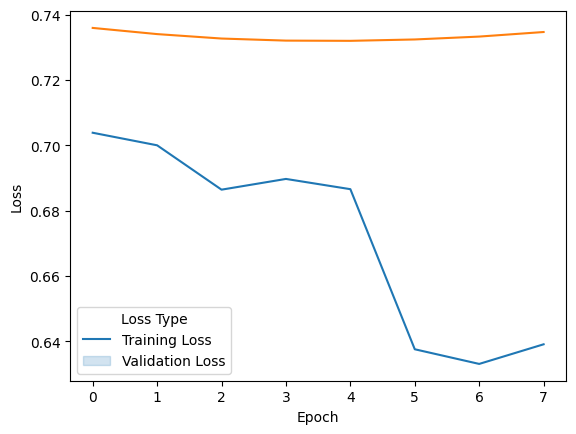

In [315]:
util.plot_history(history)

In [316]:
hist=pd.DataFrame(history.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,0.703857,0.428571,0.735936,0.285714
1,0.700012,0.428571,0.734046,0.321429
2,0.686435,0.500000,0.732687,0.357143
3,0.689720,0.500000,0.732052,0.321429
4,0.686585,0.482143,0.731984,0.321429
5,0.637589,0.589286,0.732404,0.392857
6,0.633103,0.607143,0.733286,0.571429
7,0.639108,0.660714,0.734683,0.571429


In [317]:
# train_acc = model1.evaluate(X_train, y_train, verbose=0)
# test_acc = model1.evaluate(X_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


In [318]:
model1.evaluate(X_test,y_test)

1/1 [==============================] - 0s 10ms/step - loss: 0.7327 - accuracy: 0.3571


[0.7326873540878296, 0.3571428656578064]